<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AprendizajeProfundo/Diplomado/blob/master/Temas/M%C3%B3dulo%2014-%20Aprendizaje%20no%20Supervisado/Cuadernos/ACM.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# <span style="color:#F72585">Análisis de correspondencias múltiples (ACM)</span>


```{admonition} Cuidado
:class: 
Los trozos de código de esta página son de R. Por favor, ejecútelos en Colab
```



<!--  -->
**Fuente:** Pardo CE (2020)  [Estadística descriptiva multivariada](http://ciencias.bogota.unal.edu.co/fileadmin/Facultad_de_Ciencias/Publicaciones/Imagenes/Portadas_Libros/Estadistica/Estadistica_descriptiva_multivariada/libroEstadisiticaDescriptivaMultivariadaDigital.pdf)

## <span style="color:#4361EE">Objetivos del ACM</span>


- Describir las asociaciones entre las categorías de las variables activa. 
- Descubrir patrones de individuos, que pueden dar origen a grupos de ellos.
- Sintetizar en imágenes geométricas (planos factoriales) las asociaciones entre categorías y los posibles grupos de individuos.
- Explorar la explicación de la estructura inducida por las categorías activas, con variables que juegan el papel de ilustrativas.

Adicionalmente:

- Cuantificar las variables cualitativas.  
- Reducir de dimensión.
- Filtrar: conservar la información y eliminar el ruido.

El ACM es una extensión del ACS con propiedades muy particulares. 


<center>
<img src="https://martinhinz.github.io/smada_I_2019/images/12_session/multi_space.png" alt="eigenvectores" width="400">
<center>

## <span style="color:#4361EE">Ejemplo: descripción de admitidos según algunas variables sociodemográficas,  notación y transformaciones de datos</span>




- Descripción de los 445 admitidos a la Facultad de Ciencias, para el semestre de 2013-I.
- Datos disponibles en *admi{FactoClass}*
- Se utilizan como variables activas las sociodemográficas disponibles: 
    - Género: Femenino, Masculino
    - Edad: 16 o menos, 17, 18, 19 o más
    - Estrato: bajo, medio, alto
    - Procedencia: Bogotá, Cundinamarca, Otro



### <span style="color:#4CC9F0">Notación</span>


- La tabla de datos se denomina *de código condensado* (denotada por **Y** y no tiene significado numérico). 
- Las $n$ filas representan a los individuos y 
- las $s$ columnas a las variables cualitativas. 
- En el lenguaje de diseño de experimentos las columnas son factores
- Las categorías son los niveles de los factores. 
- En R estas variables son de tipo factor.

## <span style="color:#4361EE">Tabla de datos del ejemplo Admitidos</span>


In [1]:
install.packages('FactoClass')
library(FactoClass)

NameError: name 'library' is not defined

### <span style="color:#4CC9F0">Tabla de datos **Y**</span>


In [ ]:
data(admi)
print("Names")
names(admi)

Y<-admi[,8:11] #tomamos las columnas genero, estrato, origen y edad
paste("Dimensión de Y:",dim(Y)[1],"x",dim(Y)[2])

[1] "Names"


[1] "carr" "mate" "cien" "soci" "text" "imag" "exam" "gene" "estr" "orig"
[11] "edad" "niLE" "niMa" "stra" "age"

[1] "Dimensión de Y: 445 x 4"

In [17]:
# estracto de la tabla: múltiplo de 25
sel<-seq(25,425,25)
sel
Y[sel,]

[1]  25  50  75 100 125 150 175 200 225 250 275 300 325 350 375 400 425

,gene,estr,orig,edad
25,F,medio,Otro,a17
50,M,bajo,Bogo,a18
75,M,bajo,Bogo,a17
100,M,medio,Bogo,a18
125,F,medio,Otro,a17
150,F,bajo,Bogo,a16m
175,M,alto,Bogo,a19M
200,F,bajo,Otro,a17
225,M,alto,Otro,a16m
250,M,alto,Bogo,a17


### <span style="color:#4CC9F0">Tabla disyuntiva completa (TDC): **Z** </span>


In [18]:
Z<-acm.disjonctif(Y)
print("Dimensión de Z:")
dim(Z)
names(Z)<-substr(names(Z),6,8)

Z[sel,] #sel<-seq(25,425,25)
Y[sel[1:4],]
Z[sel[1:4],]

[1] "Dimensión de Z:"


[1] 445  12

,F,M,baj,med,alt,Bog,Cun,Otr,a16,a17,a18,a19
25,1,0,0,1,0,0,0,1,0,1,0,0
50,0,1,1,0,0,1,0,0,0,0,1,0
75,0,1,1,0,0,1,0,0,0,1,0,0
100,0,1,0,1,0,1,0,0,0,0,1,0
125,1,0,0,1,0,0,0,1,0,1,0,0
150,1,0,1,0,0,1,0,0,1,0,0,0
175,0,1,0,0,1,1,0,0,0,0,0,1
200,1,0,1,0,0,0,0,1,0,1,0,0
225,0,1,0,0,1,0,0,1,1,0,0,0
250,0,1,0,0,1,1,0,0,0,1,0,0


,gene,estr,orig,edad
25,F,medio,Otro,a17
50,M,bajo,Bogo,a18
75,M,bajo,Bogo,a17
100,M,medio,Bogo,a18


,F,M,baj,med,alt,Bog,Cun,Otr,a16,a17,a18,a19
25,1,0,0,1,0,0,0,1,0,1,0,0
50,0,1,1,0,0,1,0,0,0,0,1,0
75,0,1,1,0,0,1,0,0,0,1,0,0
100,0,1,0,1,0,1,0,0,0,0,1,0


- La TDC **Z** es una yuxtaposición de *s* tablas, donde *s* es el número de variables:
$$\mathbf{Z}=[\mathbf{Z}_1 \ \mathbf{Z}_2 \ \cdots \mathbf{Z}_q \ \cdots \ \mathbf{Z}_s]$$
    - Una variable cualitativa $q$  $\rightarrow$ Genera partición  de los $n$ individuos en $p_q$ grupos,  $p_q$ = número de categorías de la variable $q$. 
    - En cada fila de $\mathbf{Z}_q$ siempre hay un 1 y sólo un 1. 
    - La suma en cada fila de $\mathbf{Z}_q$  es de 1. 
    - Como hay $s$ submatrices $\mathbf{Z}_q$, la suma de cada fila de $\mathbf{Z}$ es $s$, es decir que su marginal fila es un vector de $n$ veces $s$ 
    - El total de **Z** es $ns$. 
    - En el ejemplo $s=4$,  $n=445$ y el total de la tabla $4*445=1780$.
    - La suma de cada columna de **Z** es el número de individuos que asumen la categoría $j$ que se denota $n_j$. 
    - La $\sum\limits_{j \in Z_q} n_j = n$. $Z_q$ es el conjunto de categorías de la variable $q$. 


### <span style="color:#4CC9F0">Tabla de Burt</span>


In [19]:
Z<-as.matrix(Z)
B<-t(Z)%*%Z
B

,F,M,baj,med,alt,Bog,Cun,Otr,a16,a17,a18,a19
F,128,0,46,59,23,89,9,30,46,45,18,19
M,0,317,133,126,58,222,29,66,72,126,38,81
baj,46,133,179,0,0,95,22,62,44,58,22,55
med,59,126,0,185,0,151,11,23,47,74,26,38
alt,23,58,0,0,81,65,5,11,27,39,8,7
Bog,89,222,95,151,65,311,0,0,70,116,47,78
Cun,9,29,22,11,5,0,38,0,9,19,2,8
Otr,30,66,62,23,11,0,0,96,39,36,7,14
a16,46,72,44,47,27,70,9,39,118,0,0,0
a17,45,126,58,74,39,116,19,36,0,171,0,0


$$ \mathbf{B}=\mathbf{Z'}\mathbf{Z}$$
- **B** es de orden $p\times p$
- Se denota la yuxtaposición de tablas de contingencia cruzando todas las variables por parejas, como:
$$\mathbf{Z'}_q\mathbf{Z}_{q'}$$
- Bloque diagonal con matrices diagonales
 $$\mathbf{Z'}_q\mathbf{Z}_{q} = diag(n_j), \ \ \ j \in J_q$$ 
- La matriz diagonal con los elementos diagonales de  $\mathbf{B}$ = suma de las columnas de **Z**:
$$\mathbf{D}_p = diag(n_j)$$
 


In [20]:
# Matriz diagonal con elementos de la tabla de BURT (B)
Dp<-diag(diag(B))
Dp

128,0,0,0,0,0,0,0,0,0,0,0
0,317,0,0,0,0,0,0,0,0,0,0
0,0,179,0,0,0,0,0,0,0,0,0
0,0,0,185,0,0,0,0,0,0,0,0
0,0,0,0,81,0,0,0,0,0,0,0
0,0,0,0,0,311,0,0,0,0,0,0
0,0,0,0,0,0,38,0,0,0,0,0
0,0,0,0,0,0,0,96,0,0,0,0
0,0,0,0,0,0,0,0,118,0,0,0
0,0,0,0,0,0,0,0,0,171,0,0
0,0,0,0,0,0,0,0,0,0,56,0


## <span style="color:#4361EE">El ACM como un ACS de la TDC</span>




De ahora en adelante  el término análisis de correspondencias simples (ACS) es sinónimo de  análisis de correspondencias correspondencias (AC), entonces el ACM es el AC de la tabla disyuntiva completa (TDC) **Z** y escribimos $AC(\mathbf{Z})$

- Tabla de frecuencias relativas: $$\mathbf{F}=\dfrac{1}{ns}\mathbf{Z}$$
- Marginales fila:  $f_{i\cdot}=\dfrac{1}{n};  \forall i$ 
- Marginales columna:  $f_{\cdot j}=\dfrac{n_j}{ns}; \forall j$
- En el ejemplo: $f_{i\cdot}=\dfrac{1}{445}=0.22\%;  \forall i=1,\cdots,445$ 
- $f_{\cdot j}~=~\dfrac{n_j}{445*4}~=\dfrac{n_j}{1780}; \forall j = 1,\cdots,12$, 
- Por ejemplo  $f_{\cdot 1}~=~\dfrac{128}{1780}=7.19\%$.


In [23]:
n<-nrow(Y) #numero de filas
s<-ncol(Y) #numero de columnas
F<-1/n*s*Z
round(head(F[sel,]),3)

,F,M,baj,med,alt,Bog,Cun,Otr,a16,a17,a18,a19
25,0.009,0.000,0.000,0.009,0,0.000,0,0.009,0.000,0.009,0.000,0
50,0.000,0.009,0.009,0.000,0,0.009,0,0.000,0.000,0.000,0.009,0
75,0.000,0.009,0.009,0.000,0,0.009,0,0.000,0.000,0.009,0.000,0
100,0.000,0.009,0.000,0.009,0,0.009,0,0.000,0.000,0.000,0.009,0
125,0.009,0.000,0.000,0.009,0,0.000,0,0.009,0.000,0.009,0.000,0
150,0.009,0.000,0.009,0.000,0,0.009,0,0.000,0.009,0.000,0.000,0


### <span style="color:#4CC9F0">Nube de Individuos</span>


Los $n$ individuos conforman la nube $N_n$ en $\mathbb{R}^p$

- Coordenadas: filas de la tabla $\dfrac{1}{s}\mathbf{Z}$:
barras de altura $1/s$ cuando el individuo asume la categoría $j$ y 0 cuando no la asume.
- Peso: $\dfrac{1}{n}$
- Métrica:  $\mathbf{M}=ns \mathbf{D}_p^{-1}, \ \ \ \mathbf{D}_p = diag(n_j) $
- En el ejemplo: un perfil fila es ${\dfrac{1}{4} z_{ij}; j=1,\cdots,12}$, 
- con peso 0.22\%. 
- Extracto de algunos perfiles 

In [ ]:
head(1/4*Z[sel,],4)

,F,M,baj,med,alt,Bog,Cun,Otr,a16,a17,a18,a19
25,0.25,0.00,0.00,0.25,0,0.00,0,0.25,0,0.25,0.00,0
50,0.00,0.25,0.25,0.00,0,0.25,0,0.00,0,0.00,0.25,0
75,0.00,0.25,0.25,0.00,0,0.25,0,0.00,0,0.25,0.00,0
100,0.00,0.25,0.00,0.25,0,0.25,0,0.00,0,0.00,0.25,0


- La métrica en este espacio de los individuos tiene término general $m_j = \dfrac{1780}{n_j}$.


In [27]:
# Diagonal de la matriz de métrica
print("Names:")
colnames(Z)
print("Diagonal de la matriz de métrica:")
round(n*s*1/diag(Dp),1)

[1] "Names:"


[1] "F"   "M"   "baj" "med" "alt" "Bog" "Cun" "Otr" "a16" "a17" "a18" "a19"

[1] "Diagonal de la matriz de métrica:"


[1] 13.9  5.6  9.9  9.6 22.0  5.7 46.8 18.5 15.1 10.4 31.8 17.8

### <span style="color:#4CC9F0">Centro de gravedad</span>


- La coordenada $j$ del centro de gravedad $g_p$ es $\dfrac{1}{n}\sum\limits_{i=1} ^n \dfrac{1}{s} z_{ij}=\dfrac{n_j}{ns} $, que es la marginal columna de $\mathbf{F}=\dfrac{1}{ns}\mathbf{Z}$.
- Para obtener el  centro de gravedad, expresado en porcentaje, se puede de la siguiente manera:

In [ ]:
round(colSums(1/n/s*Z)*100,1)

F    M  baj  med  alt  Bog  Cun  Otr  a16  a17  a18  a19 
 7.2 17.8 10.1 10.4  4.6 17.5  2.1  5.4  6.6  9.6  3.1  5.6

### <span style="color:#4CC9F0">Distancia entre individuos</span>


$$
d^2(i,l)=ns\sum_{j=1}^p \frac{1}{n_j} \left(\dfrac{1}{s}\left[ z_{ij}-z_{lj} \right] \right)^2=
\frac{n}{s} \sum_{j=1}^p \frac{1}{n_j} \left(z_{ij}-z_{lj} \right)^2 
$$

- Si dos individuos se parecen = asumen más o menos las mismas categorías. 
- La distancia se amplifica más cuando uno solo de los dos individuos asume una categoría de baja frecuencia.
- Por ejemplo la distancia al cuadrado entre los  individuos 50 y 100  es $d^2(i50,i100)= \dfrac{445}{4}\left(\dfrac{1}{179}+\dfrac{1}{185}\right)=1.22$ y la diferencia entre ellos en estrato bajo y medio:


In [ ]:
Y[c(50,100),]

,gene,estr,orig,edad
,<fct>,<fct>,<fct>,<fct>
50,M,bajo,Bogo,a18
100,M,medio,Bogo,a18


### <span style="color:#4CC9F0">Inercia de la nube de perfiles fila</span>


$$
\dfrac{1}{n} \sum\limits_{i=1}^n d^2(i,\mathbf{g}_p) = 
\dfrac{1}{n} \sum\limits_{i=1}^n \sum\limits_{j=1}^p \dfrac{ns}{n_j}(\dfrac{z_{ij}}{s}-\dfrac{n_j}{ns})^2= 
\dfrac{1}{s} \sum\limits_{j=1}^p \dfrac{1}{n_j} \sum\limits_{i=1}^n (z_{ij}^2 -2 z_{ij} \dfrac{n_j}{n} + \dfrac{n_j^2}{n^2}) =
$$
$$
\dfrac{1}{s} (p -  2 s  + s) = \dfrac{p}{s} - 1
$$

- La inercia de la nube de puntos depende del cociente entre el número de categorías y el número de variables, no de los valores internos de la tabla, por lo tanto no tiene significado estadístico.
- En el ejemplo es $12/4 -1 = 2$.


### <span style="color:#4CC9F0">Eje y subespacios vectoriales</span>


$$ 
AC(Z) = ACP\left(\dfrac{1}{s}\mathbf{Z},ns\mathbf{D}_p^{-1},\dfrac{1}{n}\mathbf{I}_n\right)
$$

- La matriz de inercia es: 
$$
\dfrac{1}{s}\mathbf{Z'}\dfrac{1}{n}\mathbf{I}_n\dfrac{1}{s}\mathbf{Z}ns\mathbf{D}_p^{-1}=
\dfrac{1}{s}\mathbf{Z'Z}\mathbf{D}_p^{-1}=
\dfrac{1}{s}\mathbf{B}\mathbf{D}_p^{-1}
$$

- El rango de esta matriz es igual al rango de **Z**, que es $p-s$, porque por cada variable hay una columna que es linealmente dependiente, 
- Una columna se puede obtener como la diferencia entre el vector de $n$ unos y la suma de las demás columnas asociadas a la variable.  
- La nube de puntos está soportada en un subespacio de dimensión $p-s$, que es el número de valores propios mayores que cero. 
- En el ejemplo hay $12-4=8$ valores propios mayores que cero,

### <span style="color:#4CC9F0">Valores propios del ACM de admitidos</span>


Inertia information:
Call: inertia.dudi(x = acm)

Decomposition of total inertia:
    inertia     cum  cum(%)
Ax1  0.3366  0.3366   16.83
Ax2  0.3128  0.6493   32.47
Ax3  0.2827  0.9320   46.60
Ax4  0.2471  1.1791   58.96
Ax5  0.2408  1.4199   71.00
Ax6  0.2293  1.6493   82.46
Ax7  0.2075  1.8568   92.84
Ax8  0.1432  2.0000  100.00

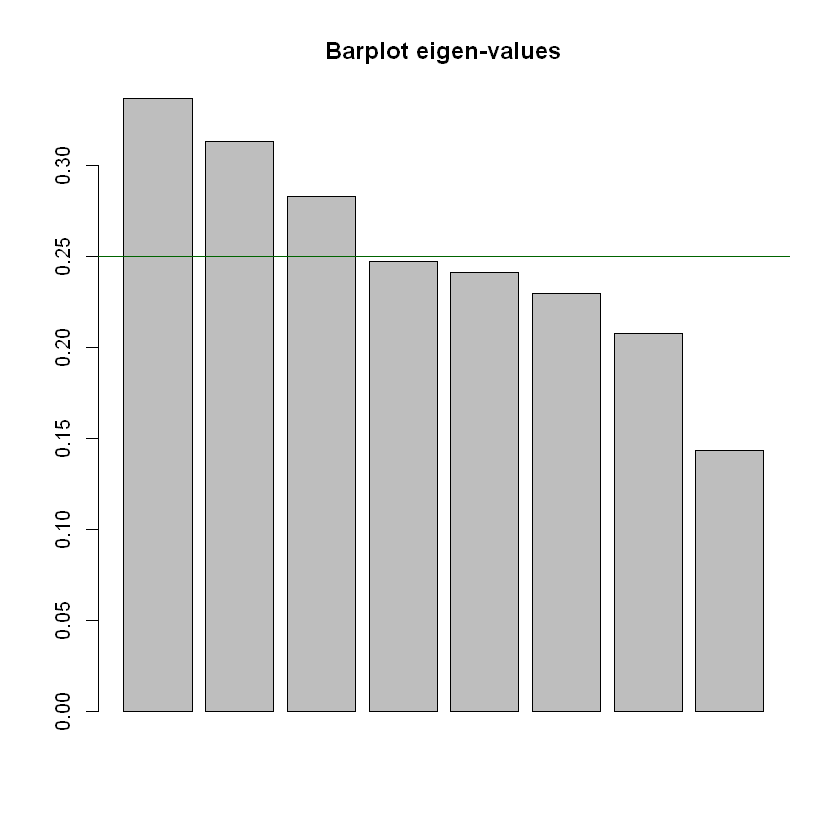

In [30]:
acm<-dudi.acm(Y,scannf=FALSE,nf=3)
inertia(acm)
barplot(acm$eig,main="Barplot eigen-values")
abline(h=sum(acm$eig)/8,col="darkgreen")

### <span style="color:#4CC9F0">Primer plano factorial del ACM de admitidos</span>


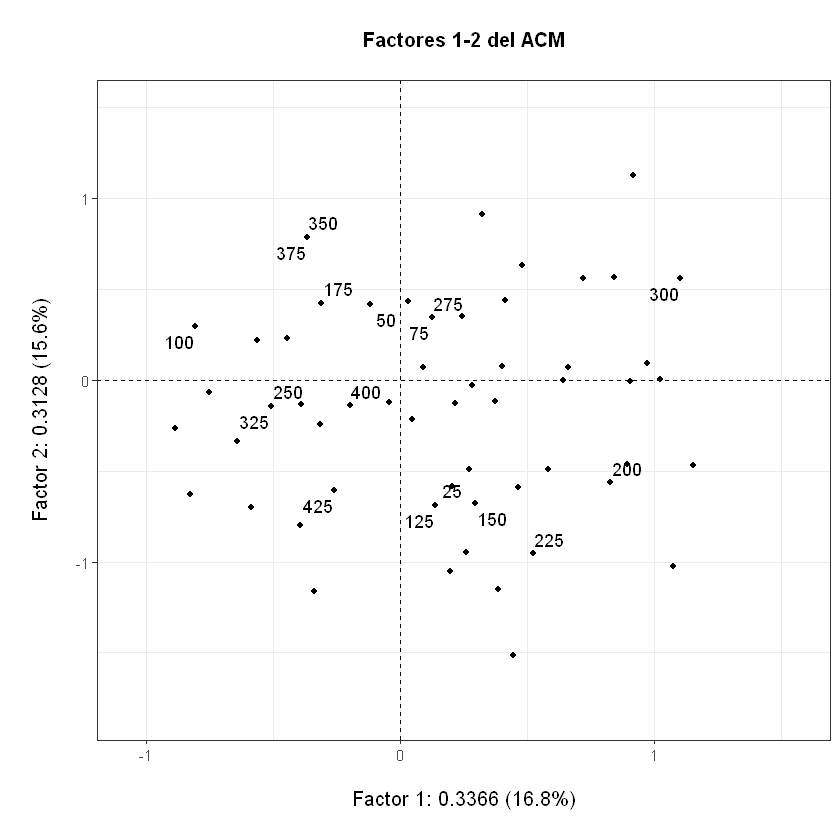

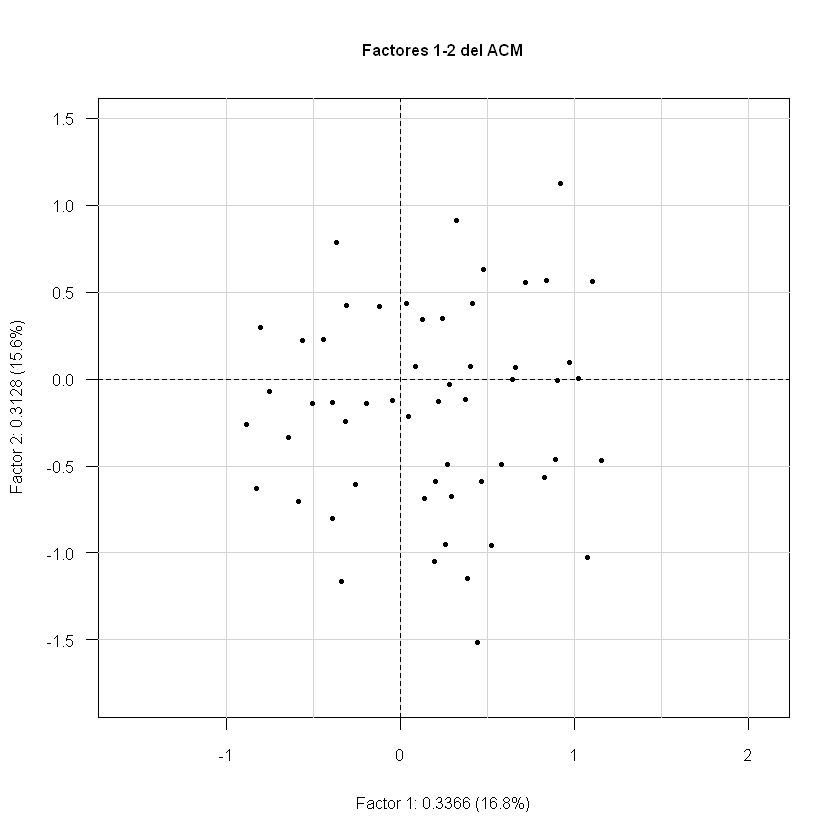

In [37]:
plot(acm,Tcol=FALSE,gg=TRUE,roweti=sel,main="Factores 1-2 del ACM")
plot(acm,Tcol=FALSE,ucal=1.0,asp=1,main="Factores 1-2 del ACM")

## <span style="color:#4361EE">Nube de categorías</span>


### <span style="color:#4CC9F0">Coordenadas: Columnas de la tabla $\mathbf{ZD}^{-1}_p$</span>



- Cada perfil columna $j$ tiene solo dos alturas: cero o $1/n_j$. 
- Las alturas son en general, diferentes en cada perfil. 
- El peso de cada categoría es $\dfrac{n_j}{ns}$

### <span style="color:#4CC9F0">Centro de gravedad: Es el vector de $n$ valores $\dfrac{1}{n}$</span>



- Coordenada $i$ del centro de gravedad: 
$$ \mathbf{g}(i)  = \sum_{j=1}^p \frac{n_j}{ns} \frac{z_{ij}}{n_j} =
     \sum_{j=1}^p \frac{1}{ns} z_{ij} = \frac{1}{ns} s = \frac{1}{n}
     $$

### Métrica: $n \mathbf{I}_n$

### Distancia entre dos categorías

$$
d^2(j,k) = \sum_{i=1}^n n \left(\frac{z_{ij}}{n_j} - \frac{z_{ik}}{n_k}\right)^2
$$

### <span style="color:#4CC9F0">Interpretación de la distancia entre categorías</span>



                       Categoría k  
               
                     |   1  |  0   | suma
                     --------------------  
      Categoria   1  |   a  |  b   | n_j

         j        0  |   c  |  d   | c+d
                     -------------------- 
              suma   |  n_k | b+d  |  n
              
$$
d^2(j,k) = n \left(  \frac{n_k + n_j - 2a}{n_j n_k} \right) = 
n \left( \frac{a+c+a+b - 2a}{n_j n_k} \right) = \frac{n}{n_j n_k} (b+c)
$$              

- En la distancia de dos categorías, sólo se suman los individuos que asumen una y solo una de las dos categorías. 
- Las categorías de baja frecuencia se alejan más de las demás.

### <span style="color:#4CC9F0">Contribución de categorías y variables a la inercia </span>




- Distancia entre la categoría $j$ y el centro de gravedad $\mathbf{g}_n=\dfrac{1}{n}\mathbf{1}_n$:

$$
d^2(j,\mathbf{g}_n) = n \sum_{i=1}^{n} \left( \frac{z_{ij}}{n_j} - \frac{1}{n} \right)^2 =
n \sum_{i=1}^n \left(\frac{z_{ij}^2}{n_j^2}-2 \frac{z_{ij}}{n_j} \frac{1}{n} + \frac{1}{n^2}\right)=
  \frac{n}{n_j} - 1
$$

-  Las categorías de menos frecuencia son las más alejadas del origen

$$
I(N_p) =\sum_{q=1}^s \sum_{j \in J_q} \frac{n_j}{ns} d^2(j,\mathbf{g}_n) = 
\sum_{q=1}^s \sum_{j \in J_q}  \frac{n_j}{ns} \left(\frac{n}{n_j}-1\right) =
\sum_{q=1}^s \sum_{j \in J_q}  \frac{1}{s} \left(1-\frac{n_j}{n}\right) 
$$

- $J_q$ es el conjunto de categorías que pertenecen la variable $q$. 





### <span style="color:#4CC9F0">Contribuciones a la inercia</span>


- De una categoría $j$: $ \dfrac{1}{s}\left(1-\dfrac{n_j}{n}\right) $, contribuyen más las categorías de baja frecuencia.
- De una variable $q$: $\sum\limits_{j \in J_q}  \dfrac{1}{s} \left(1-\dfrac{n_j}{n}\right) = 
\dfrac{1}{s}\left(p_q-\dfrac{n}{n}\right) = \dfrac{1}{s}\left(p_q-1\right)$,  contribuyen más las variables con más categorías
- Inercia total: $\sum\limits_{q=1}^s  \dfrac{1}{s}\left(p_q-1\right) = \dfrac{1}{s}(p-s) =\dfrac{p}{s}-1$. No tiene significado estadístico,  no depende de los valores de la tabla sino de la relación entre número de categorías y número de variables.

## <span style="color:#4361EE">Subespacio de proyección de las categorías</span>


### <span style="color:#4CC9F0">Primer plano Factorial</span>


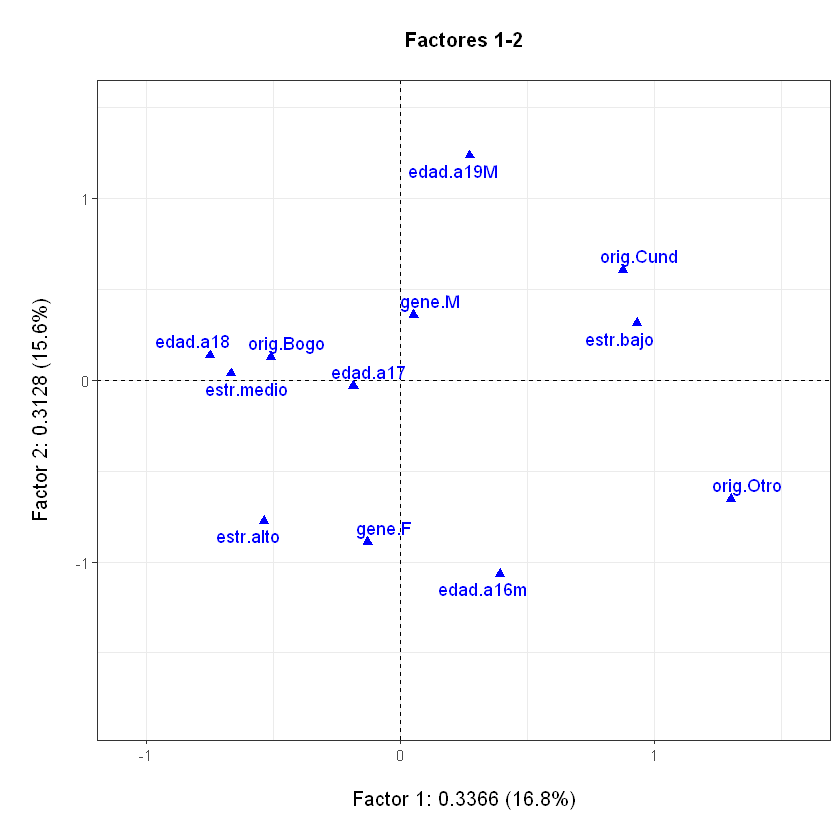

In [39]:
plot(acm,Trow=FALSE,gg=TRUE,main="Factores 1-2")

### <span style="color:#4CC9F0">Coordenadas y ayudas para la interpretación de las categorías para los tres primeros ejes</span>


In [40]:
ayuacm<-inertia(acm,,T)
names(ayuacm)
round(cbind(acm$co,ayuacm$col.abs,ayuacm$col.rel,ayuacm$col.contrib),2)
round(sum(acm$eig)/12*100,2)

[1] "tot.inertia" "col.contrib" "col.abs"     "col.rel"     "col.cum"    
[6] "nf"          "call"

,Comp1,Comp2,Comp3,Axis1,Axis2,Axis3,Axis1,Axis2,Axis3,ayuacm$col.contrib
gene.F,-0.13,-0.89,0.51,0.36,18.21,6.66,-0.67,-31.97,10.58,8.90
gene.M,0.05,0.36,-0.21,0.14,7.35,2.69,0.67,31.97,-10.58,3.60
estr.bajo,0.93,0.31,0.18,25.90,3.15,1.17,58.34,6.58,2.21,7.47
estr.medio,-0.67,0.04,0.31,13.71,0.05,3.61,-31.59,0.10,6.99,7.30
estr.alto,-0.54,-0.78,-1.12,3.88,8.75,20.06,-6.39,-13.38,-27.73,10.22
orig.Bogo,-0.51,0.13,0.11,13.45,0.91,0.70,-60.15,3.76,2.65,3.76
orig.Cund,0.88,0.61,-1.44,4.87,2.51,15.72,7.16,3.44,-19.43,11.43
orig.Otro,1.30,-0.65,0.23,27.18,7.34,0.97,46.66,-11.71,1.39,9.80
edad.a16m,0.39,-1.07,0.29,3.04,24.09,1.99,5.56,-41.02,3.07,9.19
edad.a17,-0.19,-0.03,-0.88,0.98,0.03,26.54,-2.14,-0.06,-48.74,7.70


[1] 16.67

## <span style="color:#4361EE">El ACM como un ACP(X,M,N) de la TDC)</span>


 $$
 ACP(\mathbf{X,M,N})
 $$

- $\mathbf{X}= n \mathbf{I}_n\dfrac{1}{ns}\mathbf{Z} ns \mathbf{D}=n\mathbf{ZD}_p^{-1}$, 
    - término general: $x_{ij}=\dfrac{n}{n_j} z_{ij}$.
- $\mathbf{M}=\dfrac{1}{ns}\mathbf{D}_p$, 
    - término general: $m_j = \dfrac{n_j}{ns}$.
- $\mathbf{N}=\dfrac{1}{n}\mathbf{I}_n$, 
    - término general: $d_i=\dfrac{1}{n}$.

####  **M** - distancia al cuadrado entre dos individuos $i$ y $l$ 
$$
d^2(i,l) =  \sum_{j=1}^p \dfrac{n_j}{ns} \left(\dfrac{n}{n_j} z_{ij}-\dfrac{n}{n_j} z_{lj} \right)^2 
            =  \dfrac{n}{s} \sum_{j=1}^p \dfrac{1}{n_j} (z_{ij} - z_{lj})^2
$$
####  **N** - distancia al cuadrado entre dos categorías
$j$ y $k$ de **X**
$$
d^2(j,k)= \sum_{i=1}^n \frac{1}{n}\left(\dfrac{n}{n_j} z_{ij}-\dfrac{n}{n_k} z_{ik} \right)^2
            = n \sum_{i=1}^n \left(\dfrac{z_{ij}}{n_j} -\dfrac{z_{ik}}{n_k}  \right)^2
$$




### <span style="color:#4CC9F0">Relaciones cuasibaricéntricas</span>


#### <span style="color:#4CC9F0">Coordenada de una individuo en función de las coordenadas de las categorías</span>



$$
 F_s(i) = \frac{1}{\sqrt{\lambda_s}} \frac{1}{s} \sum_{j=1}^p z_{ij}  G_s(j) 
           = \frac{1}{\sqrt{\lambda_s}} \frac{1}{s} \sum_{j \in J_i}  G_s(j)
$$


- $J_i$ es el conjunto de categorías que son asumidas por el individuo $i$.
- La coordenada sobre un eje $s$ del individuo $i$ se sitúa en el promedio aritmético de las coordenadas de las categorías que asume, dilatadas por el inverso de la raíz cuadrada del valor propio. 

- Ejemplo: el primer individuo de la tabla asume las categorías:

    - Ge.F (0.1) es la coordenada sobre el primer eje, Ed.17 (0.2), Es.medio (0.7) y - Or.Otro (-1.3). 
    - Promedio aritmético: (0.1+0.2+0.7-1.3)/4 = -0.08. 
    - La dilatación es $1/\sqrt{0.337}=1.72$.
    - La coordenada es 1.72*(~-0.08) = -0.14. 


#### <span style="color:#4CC9F0">Coordenada de una categoría en función de  las coordenadas de los individuos </span>




$$  
G_s(j) = \frac{1}{\sqrt{\lambda_s}} \frac{1}{n_j} \sum_{i=1}^n  z_{ij}   F_s(i)
$$

- $I_j$ es el conjunto de individuos que asumen la categoría  $j$, 
    - La categoría $j$ se sitúa en el promedio aritmético de las coordenadas de los individuos que la asumen, dilatada por el inverso de la raíz cuadrada del valor propio.


### <span style="color:#4CC9F0">Representación simultánea en el primer plano factorial</span>


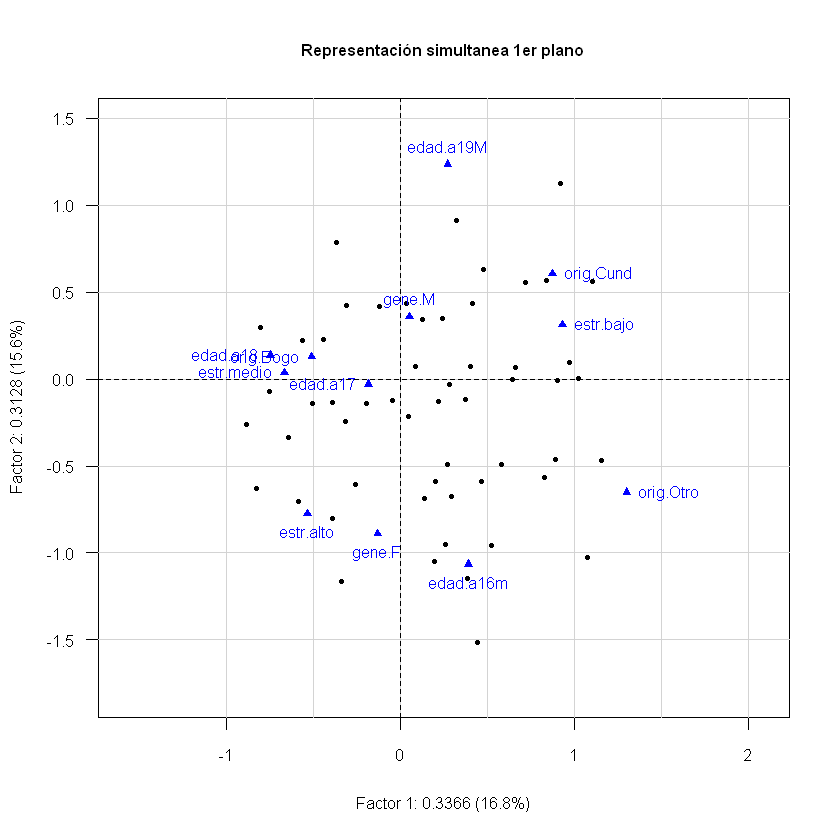

In [42]:
plot(acm,roweti="",main="Representación simultanea 1er plano")

### <span style="color:#4CC9F0">Plano factorial 2-3</span>


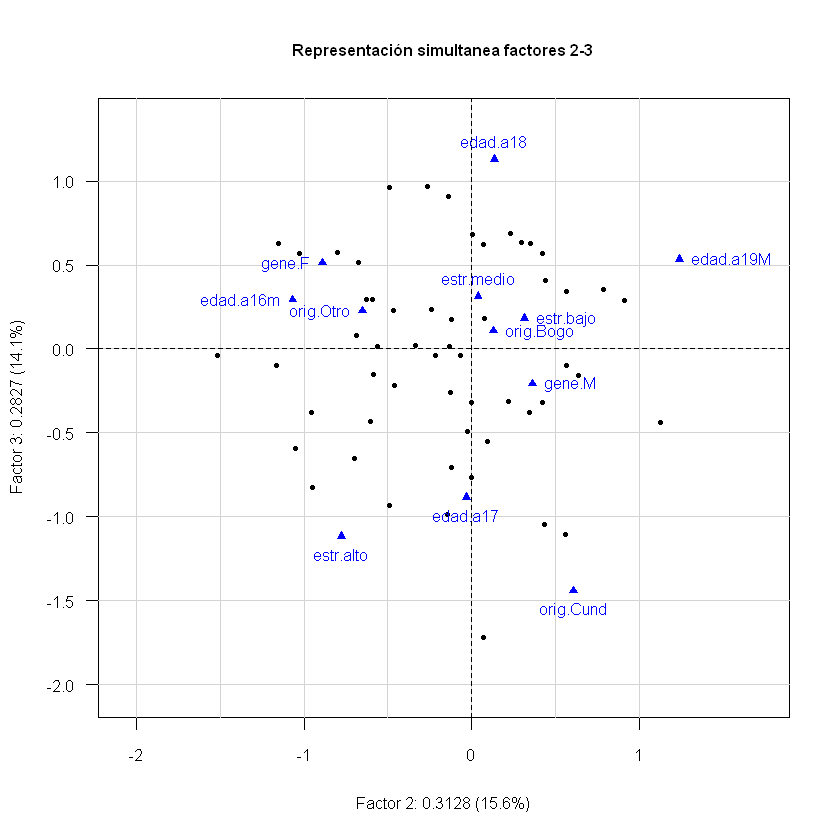

In [45]:
plot(acm,2,3,roweti="",main="Representación simultanea factores 2-3")

### <span style="color:#4CC9F0">Razones de correlación sobre un eje de las variables cualitativas</span>



- Una variable cualitativa induce una partición de los $n$ individuos y  la inercia (varianza) de los individuos sobre el eje  se puede descomponer en $varianza \ inter + varianza \ intra$. 


<center>
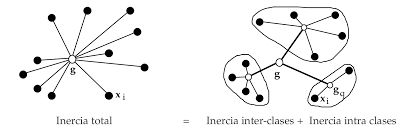
<center>

- La razón de correlación se define como el cociente entre varianza inter y varianza total.  
- La varianza total  de $F_s$ es $\lambda_s$, 
- La varianza inter con respecto a una variable $q$ es:
$$
 \sum_{j \in J_q} \frac{n_j}{n} (\overline{F}_{sj})^2
$$
 puesto que las coordenadas sobre $s$ están centradas.
donde $\overline{F}_{sj} = \sum\limits_{i \in I_{j \in J_q}} \frac{1}{n_j} F_{s}(i)$, es decir, el promedio aritmético de las coordenadas sobre el eje $s$ de los individuos que asumen la categoría $j$ de la variable $q$. 
- Por las relaciones de transición $\overline{F}_{sj} = \sqrt{\lambda_s} G_s(j)$, entonces:
$$
Varianza \ entre (q) = \lambda_s  \ \sum_{i \in J_q}  \frac{n_j}{n} G_s^2(j)
$$
y la razón de correlación es:
$$
\eta^2_s(q) = \sum_{j \in J_q} \frac{n_j}{n} G_s^2(j) 
$$
- Se puede expresar como función de la contribución absoluta de las categorías como:
$$
\eta^2_s(q) =  \lambda_s  s  \sum_{j \in q_j} Ca_s(j) 
$$
donde $J_q$ es el conjunto de categorías de la variable $q$ y $Ca_s(j)$ es la contribución absoluta de la categoría $j$ sobre el eje $s$. 
- Estos valores se encuentran en el objeto de salida de la función *dudi.acm{ade4}*, en la tabla *cr*.
- Con estas razones de correlación se pueden obtener los planos factoriales para las variables cualitativas. 
- Por ejemplo para la variable $Origen$, la suma de las contribuciones de las tres categorías sobre el primer eje es $13.45+4.87+27.18=45.5\%$, el primer valor propio es $0.3366$ y el número de variables $4$, 
- La razón de correlación es $\eta^2_1(Origen)=4*0.3366*0.455=0.613$, valor que se puede leer en la figura siguiente.


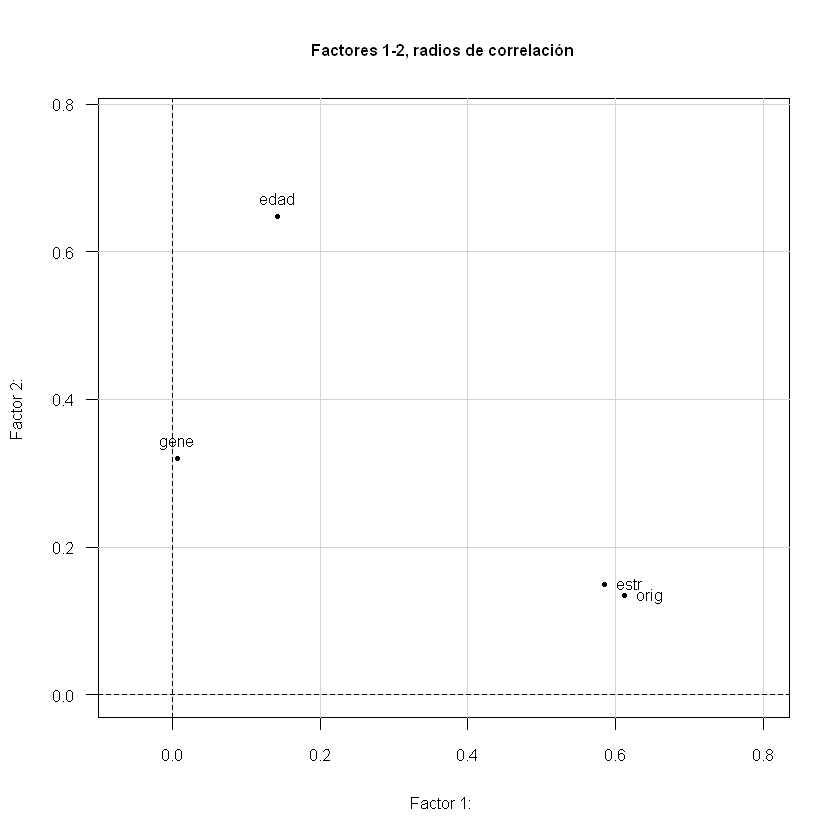

In [51]:
plotfp(acm$cr,main="Factores 1-2, radios de correlación") # función de FactoClass

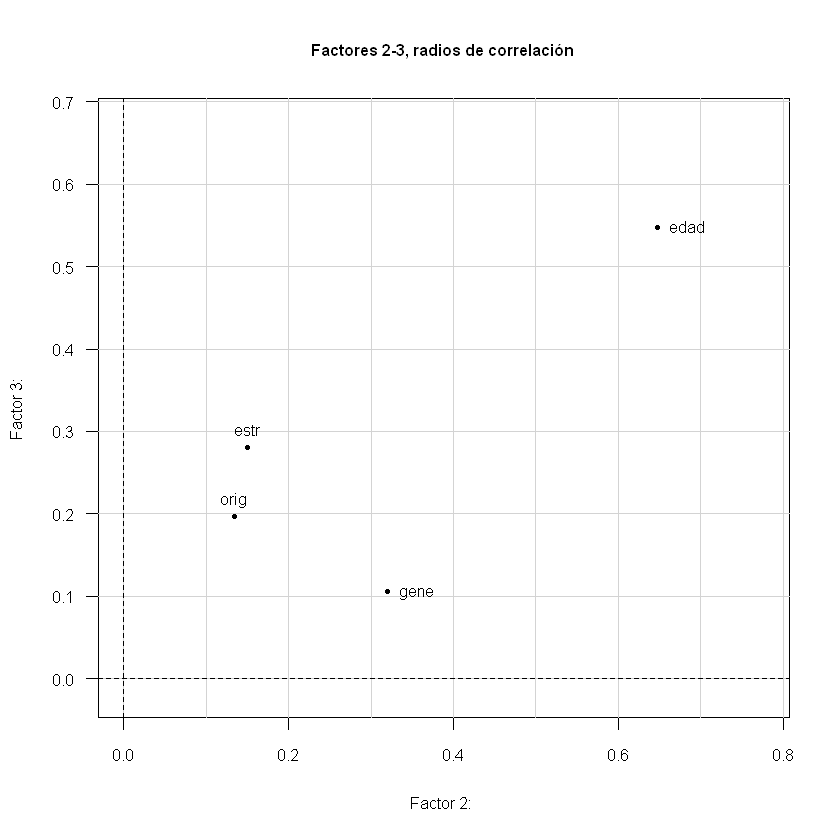

In [52]:
plotfp(acm$cr,2,3,main="Factores 2-3, radios de correlación")

## <span style="color:#4361EE">Elementos suplementarios</span>


### <span style="color:#4CC9F0">Individuos Suplementarios</span>



- Los individuos ilustrativos se pueden proyectar utilizando la fórmula cuasibaricéntrica.
- La coordenada de un individuo suplementario es el promedio de las coordenadas de las categorías que asume, dilatado por el inverso de la raíz cuadrada del valor propio.


## <span style="color:#4361EE">Variables cualitativas suplementarias</span>


- Las categorías  de una variable ilustrativa se proyectan mediante la fórmula cuasibaricéntrica  
 - Como el promedio de las coordenadas de los individuos que la asumen, dilatado por el inverso de la raíz cuadrada del valor propio. 
 - Se pueden calcular sus cosenos cuadrados sobre los ejes.
 - Valores test.


### <span style="color:#4CC9F0">Valores test para categorías suplementarias</span>



- Una categoría $j$ es asumida por los $n_j$ individuos del conjunto $I_j$, 
- Su coordenada, sobre un eje $s$ es el promedio aritmético de las coordenadas de esos individuos  sobre el eje, multiplicada por el inverso de la raíz cuadrada del valor propio $\lambda_s$. 
- Si se supone que los $n_j$ individuos se extraen al azar de los $n$ individuos:
    - La media de las coordenadas es 0 y su varianza es $\left( \dfrac{n-n_j}{n-1} \right) \dfrac{\lambda_s}{n_j}$. 
    - La varianza de la categoría $j$ se obtiene multiplicando la varianza anterior por  $\dfrac{1}{\lambda_s}$:  
     $$\dfrac{1}{\lambda_s} \left( \dfrac{n-n_j}{n-1} \right) \dfrac{\lambda_s}{n_j} =  \dfrac{n-n_j}{n(n-1)} $$
    - El valor calculado de la estadística $T$ para la verdadera coordenada es:
    $$
    t_s(j) = \sqrt{\dfrac{n_j(n-1)}{n-n_j}} G_s(j)
    $$

## <span style="color:#4361EE">Ejemplo</span>


### <span style="color:#4CC9F0">Valor test para *Química* sobre el primer eje:</span>

In [ ]:
# Número de admitidos por carreras:
summary(admi$carr)
# Valor test:
vtQui = sqrt(63*(445-1)/(445-63))*(-0.259)
round(vtQui,3)


Biol Esta Farm Fisi Geol Mate Quim 
  63   66   73   82   45   53   63

[1] -2.216

- La diferencia con el valor de la salida se debe al número de cifras significativas. 
- Este valor, menor que -2, indica que es válido leer la posición negativa  de Química sobre el primer eje, lo que significa que está asociada con estrato bajo y origen fuera de Bogotá.


### <span style="color:#4CC9F0">Carreras sobre el primer plano factorial del ACM de admitidos</span>


In [ ]:
supCarr<-supqual(acm,admi$carr)
names(supCarr)

[1] "ncat" "dis2" "coor" "tv"   "cos2" "scr"

In [ ]:
attach(supCarr)
"Coordenadas y ayudas para la interpretación"
cbind(ncat,round(cbind(dis2,coor,tv,cos2),3))
"Razones de correlación"
round(scr*100,2)
detach(supCarr)

[1] "Coordenadas y ayudas para la interpretación"

,ncat,dis2,Axis1,Axis2,Axis3,Axis1,Axis2,Axis3,Axis1,Axis2,Axis3
qual.Biol,63,6.063,-0.018,0.146,-0.068,-0.156,1.245,-0.579,0.000,0.003,0.001
qual.Esta,66,5.742,0.029,-0.104,-0.018,0.255,-0.912,-0.160,0.000,0.002,0.000
qual.Farm,73,5.096,0.168,0.198,0.392,1.566,1.845,3.664,0.006,0.008,0.030
qual.Fisi,82,4.427,0.095,-0.029,-0.127,0.948,-0.292,-1.267,0.002,0.000,0.004
qual.Geol,45,8.889,-0.040,0.076,-0.635,-0.284,0.540,-4.490,0.000,0.001,0.045
qual.Mate,53,7.396,-0.050,-0.462,0.112,-0.387,-3.579,0.869,0.000,0.029,0.002
qual.Quim,63,6.063,-0.259,0.106,0.156,-2.217,0.907,1.335,0.011,0.002,0.004


[1] "Razones de correlación"

,Axis1,Axis2,Axis3
qual,1.64,3.88,7.47


- Sólo es legítimo interpretar como diferente de cero las coordenadas de: 
- Química (-) sobre el primer eje, Matemáticas (+) sobre el segundo eje; y Geología (-) opuesto a Farmacia (+) sobre el tercer eje.  
 - Química  tiene, en comparación al promedio, mayor proporción de admitidos de  estrato bajo y origen fuera de Bogotá,
 - Matemáticas  de 19 o más años, 
 - Geología de 17 años y de estrato alto,  
 - Farmacia de 18 años y género femenino. 


### <span style="color:#4CC9F0">Proyección de las carreras sobre el primer plano factorial</span>


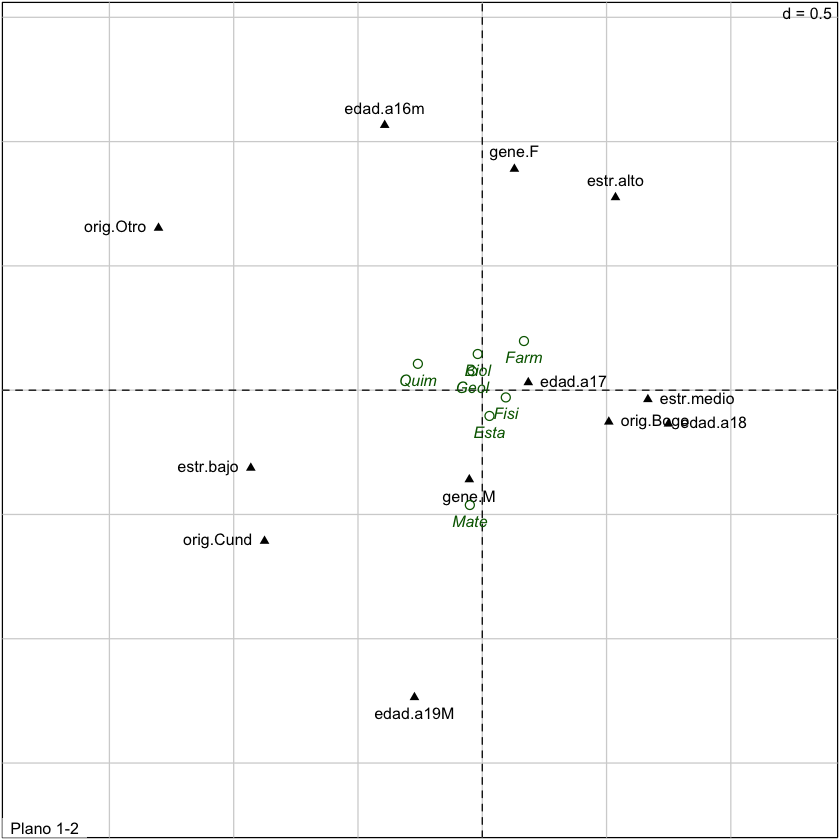

In [ ]:
plot(acm,Trow =FALSE,infaxes="no",main="Plano 1-2",
ylim =c( -1.5 ,1.3) , col.col=" black ")
points( supCarr$coor ,col ="darkgreen")
text(supCarr$coor , labels = attributes (admi[,1])$levels ,
col ="darkgreen",pos =1, cex =0.8 , font =3)

### <span style="color:#4CC9F0">Proyección de las carreras sobre el plano factorial 2-3</span>


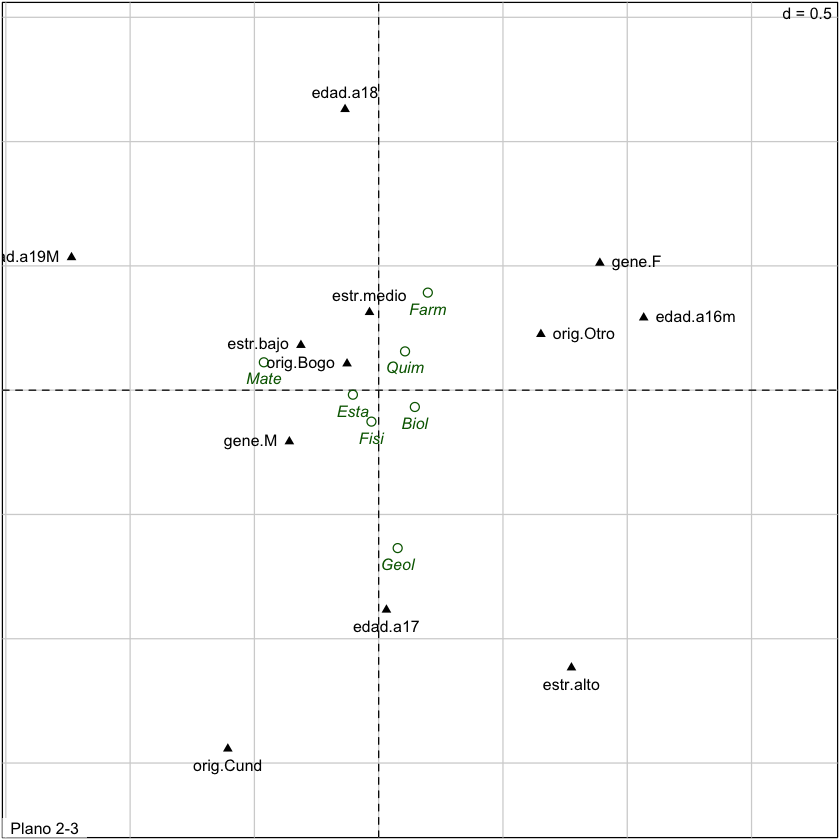

In [ ]:
plot(acm,2,3,Trow =FALSE,infaxes="no",main="Plano 2-3",
ylim =c( -1.5 ,1.3) , col.col=" black ")
points(supCarr$coor[,c(2,3)] ,col ="darkgreen")
text(supCarr$coor[,c(2,3)] , labels = attributes (admi[,1])$levels ,
col ="darkgreen",pos =1, cex =0.8 , font =3)

### <span style="color:#4CC9F0">Retorno a los datos</span>



Perfiles fila de las carreras según las variables activas, para corroborar lo que se ve en los planos factoriales

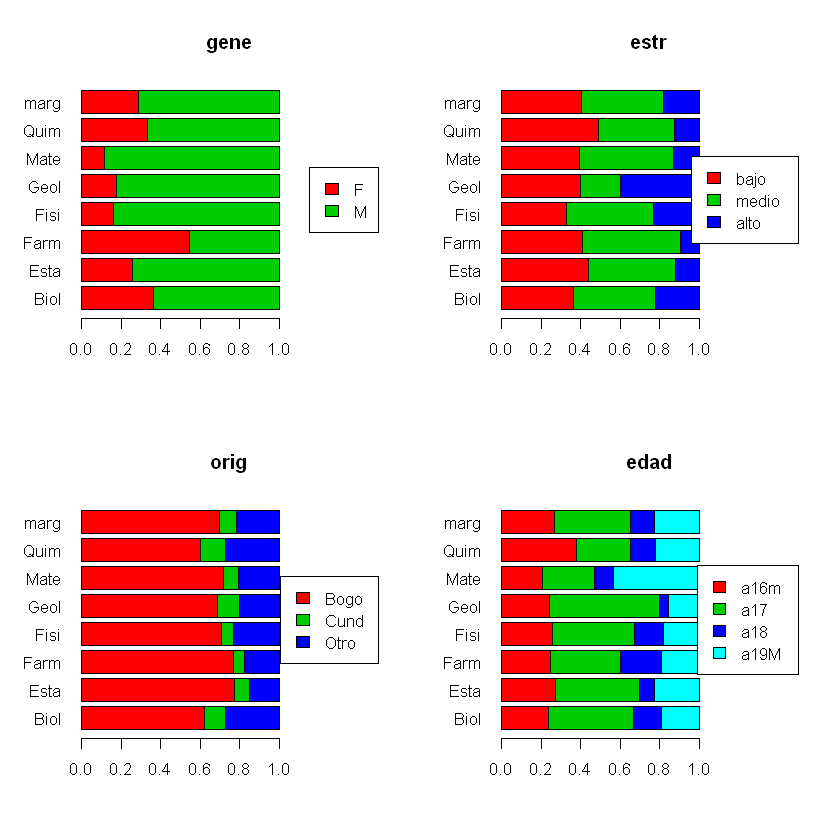

In [36]:
par(mfrow=c(2,2))
for (varac in 8:11){
    K<-unclass(table(admi$carr,admi[,varac]))
    plotct(K,"row",col=2:5,main=colnames(admi)[varac])
}

- Química  tiene, en comparación al promedio, mayor proporción de admitidos de  estrato bajo y origen fuera de Bogotá,
- Matemáticas tiene mayor proporción de admitidos de 19 o más años, 
- Geología tiene mayor proporción de admitidos de 17 años y de estrato alto,  
- Farmacia tiene mayor proporción de admitidos de 18 años y género femenino. 


Para más detalles del ACM y un ejemplo de aplicación ver el capítulo 6 del libro [EDM.](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwi6qZDBjtDzAhVeRTABHYZPBWEQFnoECAYQAQ&url=http%3A%2F%2Fciencias.bogota.unal.edu.co%2Ffileadmin%2FFacultad_de_Ciencias%2FPublicaciones%2FImagenes%2FPortadas_Libros%2FEstadistica%2FEstadistica_descriptiva_multivariada%2FlibroEstadisiticaDescriptivaMultivariadaDigital.pdf&usg=AOvVaw2Q7b-e89FbWXFda5h4sCuf)